** Experiment 4 **

* Exploratory Data Analysis of the problem
* What is the nature of the data ?
* How is the data laid out ?
* Feature Generation Ideas

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy as sp
import gc

import matplotlib.pyplot as plt
import seaborn as sns

from natsort import natsorted
from collections import defaultdict
from sklearn.feature_extraction import DictVectorizer

from itertools import combinations

sns.set_style('dark')
pd.set_option('max_columns', None)

from tqdm import tqdm_notebook
import time

SEED = 131341
np.random.seed(SEED)

import warnings
warnings.filterwarnings('ignore')

%run ../src/data/HotstarDataset.py
%run ../src/features/categorical_features.py

In [2]:
dataset = Hotstar('../data/raw/5f828822-4--4-hotstar_dataset/')
dataset.load_data('../data/processed/hotstar_processed.feather')

data       = dataset.data
train_mask = dataset.get_train_mask() 

** Similarities between train and test set **

In [36]:
# cities involved in training set
cities_train = set([])
cities_test  = set([])

def add_to_train_set(cities):
    for city in cities.split(','):
        cities_train.add(city)

def add_to_test_set(cities):
    for city in cities.split(','):
        cities_test.add(city)

data.loc[train_mask, 'cities'].str.replace('[:](\d+)', '')\
    .map(add_to_train_set)
    
data.loc[~train_mask, 'cities'].str.replace('[:](\d+)', '')\
    .map(add_to_test_set);

In [37]:
print('Cities that are in training set but not in test set \n', cities_train - cities_test)

Cities that are in training set but not in test set 
 {'kokrajhar', 'bien hoa', 'tomelloso', 'ballerup', 'higashi', 'campulung', 'saskatoon', 'cancun', 'sehore', 'windhoek', 'satara', 'montfermeil', 'tumkur', 'kuala dungun', 'kuppam', 'poissy', 'silkeborg', 'weehawken', 'gent', 'tauranga', 'norwich', 'lake forest', 'vishakhapatnam', 'jind', 'albuquerque', 'phuket', 'tardeo', 'kota pinang', 'yojna vihar', 'lubumbashi', 'baton rouge', 'sunnyvale', 'vientiane', 'cachan', 'kuala pilah', 'small heath', 'university of new south wales', 'betul', 'ongole', 'waltham', 'grafton', 'sunshine', 'quanzhou', 'vilvoorde', 'timisoara', 'mahwa', 'aubonne', 'bedok', 'pali', 'semarang', 'ilford', 'mount gambier', 'logrono', 'fort-de-france', 'sungai petani', 'alexandria', 'racine', 'stapleford', "lower prince's quarter", 'exeter', 'west bromwich', 'yiwu', 'hahira', 'massy', 'jagadhri', 'rzeszow', 'bari', 'guayaquil', 'norrkoping', 'vittal nagar', 'thornhill', 'clichy', 'kuala belait', 'hampton', 'albury',

In [38]:
print('Cities that are in test set but not in training set \n', cities_test - cities_train)

Cities that are in test set but not in training set 
 {'baltimore', 'asker', 'pitesti', 'merrimack', 'beaverton', "qiu'aizhen", 'frankfurt-innenstadt', 'monterrey', 'baki', 'aabenraa', 'sarcelles', 'cagliari', 'merrifield', 'tehri', 'yuzhno-sakhalinsk', 'rewari', 'alor setar', 'jawahar nagar', 'veenendaal', 'matawan', 'frankfurt-griesheim', 'fuzhou', 'llantwit fardre', 'jalgaon', 'paradiso', 'pithoragarh', 'wageningen', 'tranbjerg', 'regina', 'nanaimo', 'pozuelo de alarcon', 'colpalombo', 'phaltan', 'zhengzhou', 'toluca de lerdo', 'saint peter port', 'pantin', 'roxas', 'pleasanton', 'bridgetown', 'irvine', 'krabi', 'midrand', 'quebec city', 'kosice', 'fort huachuca', 'joda', 'tampa', 'gaborone', 'de hoef', 'taiping', 'chelyabinsk', 'guetersloh', '`ajman', 'bloherfelde', 'oakville', 'rostov-na-donu', 'porbandar', 'bath', 'barnaul', 'bridgeton', 'carshalton', 'perris', 'cuxhaven', 'cuddalore', 'perugia', 'angamaly', 'cirebon', 'xiamen', 'panathur', 'belize city', 'son en breugel', 'dhang

In [39]:
# cities involved in training set
genres_train = set([])
genres_test  = set([])

def add_to_train_set(genres):
    for genre in genres.split(','):
        genres_train.add(genre)

def add_to_test_set(genres):
    for genre in genres.split(','):
        genres_test.add(genre)

data.loc[train_mask, 'genres'].str.replace('[:](\d+)', '')\
    .map(add_to_train_set)
    
data.loc[~train_mask, 'genres'].str.replace('[:](\d+)', '')\
    .map(add_to_test_set);

In [44]:
print('Genres that are in training but not in test ', genres_train - genres_test)

Genres that are in training but not in test  set()


In [45]:
print('Genres that are in the test set but not in training set ', genres_test - genres_train)

Genres that are in the test set but not in training set  set()


** Feature Engineering **

1. Number of cities
2. Number of genres
3. Number of titles

In [17]:
data['num_cities'] = data.cities.str.replace('[:](\d+)', '').map(lambda x: len(x.split(',')))
data['num_genres'] = data.genres.str.replace('[:](\d+)', '').map(lambda x: len(x.split(',')))
data['num_titles'] = data.titles.str.replace('[:](\d+)', '').map(lambda x: len(x.split(',')))
data['num_tod']    = data.tod.str.replace('[:](\d+)', '').map(lambda x: len(x.split(',')))
data['num_dow']    = data.dow.str.replace('[:](\d+)', '').map(lambda x: len(x.split(',')))

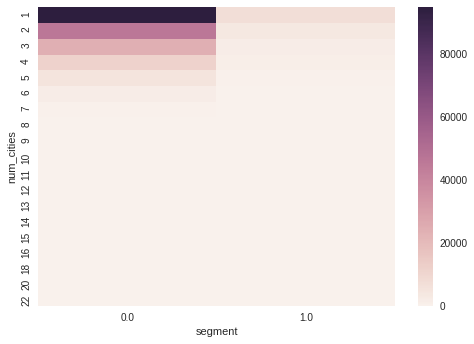

In [11]:
ss = pd.crosstab(data.loc[train_mask, 'num_cities'], data.loc[train_mask, 'segment'])
sns.heatmap(ss);

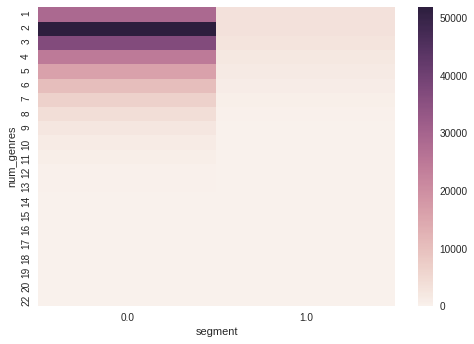

In [12]:
ss = pd.crosstab(data.loc[train_mask, 'num_genres'], data.loc[train_mask, 'segment'])
sns.heatmap(ss);

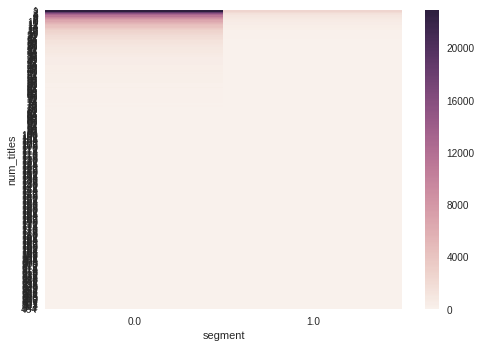

In [13]:
ss = pd.crosstab(data.loc[train_mask, 'num_titles'], data.loc[train_mask, 'segment'])
sns.heatmap(ss);

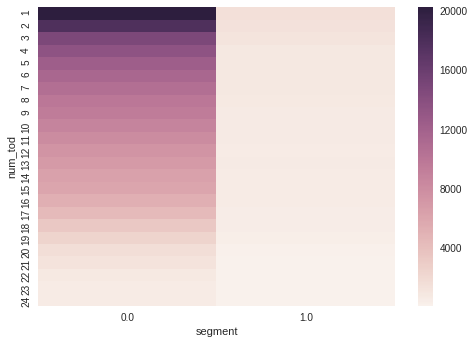

In [18]:
ss = pd.crosstab(data.loc[train_mask, 'num_tod'], data.loc[train_mask, 'segment'])
sns.heatmap(ss);

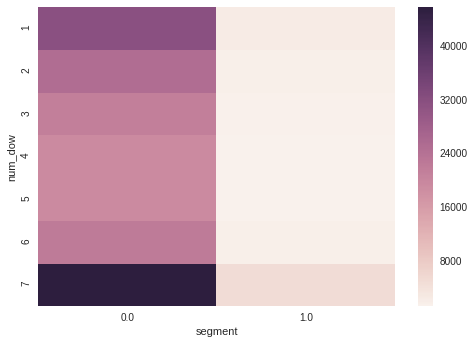

In [19]:
ss = pd.crosstab(data.loc[train_mask, 'num_dow'], data.loc[train_mask, 'segment'])
sns.heatmap(ss);

In [35]:
ids = data.loc[train_mask, 'ID'].map(lambda x: x.split('-')[1]).astype(np.int)

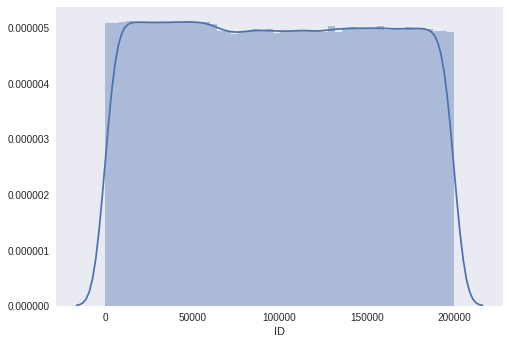

In [40]:
sns.distplot(ids[train_mask & (data.segment == 0)]);

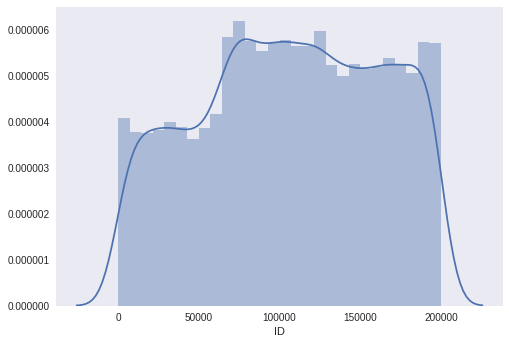

In [41]:
sns.distplot(ids[train_mask & (data.segment == 1)]);

** Relationship of segment with title **

In [47]:
out_segment_titles = defaultdict(int)
in_segment_titles  = defaultdict(int)

def count_out_samples(ts):
    titles = ts.split(',')
    
    for title in titles:
        out_segment_titles[title] += 1

def count_in_samples(ts):
    titles = ts.split(',')
    
    for title in titles:
        in_segment_titles[title] += 1
        
data.loc[train_mask & (data.segment == 0), 'titles'].str.replace('[:](\d+)', '').map(count_out_samples)
data.loc[train_mask & (data.segment == 1), 'titles'].str.replace('[:](\d+)', '').map(count_in_samples);

In [61]:
in_segment_df  = pd.DataFrame.from_dict(in_segment_titles, orient='index')
out_segment_df = pd.DataFrame.from_dict(out_segment_titles, orient='index')

In [62]:
merge_title_segments = in_segment_df.merge(out_segment_df, 
                                           left_index=True, 
                                           right_index=True,
                                           how='left'
                                          ).rename(columns={
    '0_x': 'insegment_count',
    '0_y': 'outsegment_count'
})

In [66]:
ss = merge_title_segments.sort_values(by='outsegment_count', ascending=False)
ss['ratio'] = ss['insegment_count'] / (ss['insegment_count'] + ss['outsegment_count'])

In [71]:
ss.sort_values(by=['outsegment_count', 'ratio'], ascending=False)\
  .reset_index()\
  .to_csv('../data/interim/title_segment_relationship.csv')

** Relationship of genres with segments **

In [72]:
out_segment_genres = defaultdict(int)
in_segment_genres  = defaultdict(int)

def count_out_samples(gs):
    genres = gs.split(',')
    
    for genre in genres:
        out_segment_genres[genre] += 1

def count_in_samples(gs):
    genres = gs.split(',')
    
    for genre in genres:
        in_segment_genres[genre] += 1
        
data.loc[train_mask & (data.segment == 0), 'genres'].str.replace('[:](\d+)', '').map(count_out_samples)
data.loc[train_mask & (data.segment == 1), 'genres'].str.replace('[:](\d+)', '').map(count_in_samples);

In [73]:
in_segment_df  = pd.DataFrame.from_dict(in_segment_genres, orient='index')
out_segment_df = pd.DataFrame.from_dict(out_segment_genres, orient='index')

In [74]:
merge_genres_segments = in_segment_df.merge(out_segment_df, 
                                           left_index=True, 
                                           right_index=True,
                                           how='left'
                                          ).rename(columns={
    '0_x': 'insegment_count',
    '0_y': 'outsegment_count'
})

In [76]:
ss = merge_genres_segments.sort_values(by='outsegment_count', ascending=False)
ss['ratio'] = ss['insegment_count'] / (ss['insegment_count'] + ss['outsegment_count'])

In [77]:
ss.reset_index()\
  .to_csv('../data/interim/genres_segment_relationship.csv', index=False)

** Number of seconds watched **

In [59]:
data['watch_time_sec'] = data.genres\
                             .str\
                             .replace('.+[:]', '')\
                             .map(lambda x: np.sum([int(z) for z in x.split(',')]))

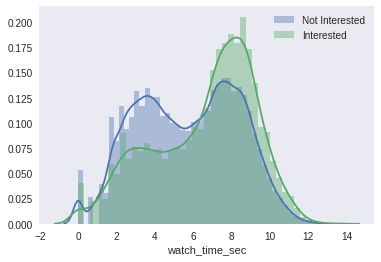

In [62]:
sns.distplot(data.loc[data.segment == 0, 'watch_time_sec'].map(np.log1p), label='Not Interested')
sns.distplot(data.loc[data.segment == 1, 'watch_time_sec'].map(np.log1p), label='Interested')
plt.legend(loc='best');

In [63]:
data['watch_time_sec_cities'] = data.cities\
                                 .str\
                                 .replace('.+[:]', '')\
                                 .map(lambda x: np.sum([int(z) for z in x.split(',')]))

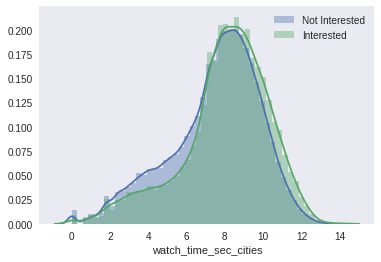

In [64]:
sns.distplot(data.loc[data.segment == 0, 'watch_time_sec_cities'].map(np.log1p), label='Not Interested')
sns.distplot(data.loc[data.segment == 1, 'watch_time_sec_cities'].map(np.log1p), label='Interested')
plt.legend(loc='best');

In [66]:
data['watch_time_sec_titles'] = data.titles\
                                 .str\
                                 .replace('.+[:]', '')\
                                 .map(lambda x: np.sum([int(z) for z in x.split(',') if len(z) > 0]))

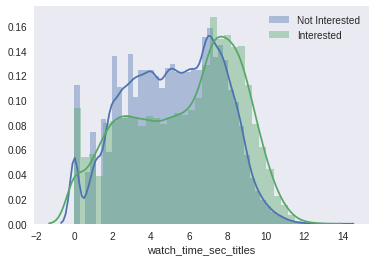

In [67]:
sns.distplot(data.loc[data.segment == 0, 'watch_time_sec_titles'].map(np.log1p), label='Not Interested')
sns.distplot(data.loc[data.segment == 1, 'watch_time_sec_titles'].map(np.log1p), label='Interested')
plt.legend(loc='best');

** Watch Patterns by Day of the week **

In [8]:
dow_dict_train = data.loc[train_mask, 'dow'].map(lambda x: x.split(','))\
                     .map(lambda x: dict((k.strip(), int(v.strip())) for k,v in 
                                          (item.split(':') for item in x)))

dow_dict_test  = data.loc[~train_mask, 'dow'].map(lambda x: x.split(','))\
                     .map(lambda x: dict((k.strip(), int(v.strip())) for k,v in 
                                          (item.split(':') for item in x)))
    
dv    = DictVectorizer(sparse=False)
X     = dv.fit_transform(dow_dict_train)
Xtest = dv.transform(dow_dict_test)

y     = data.loc[train_mask, 'segment']

In [12]:
X     = pd.DataFrame(X, columns=np.arange(1, 8))
Xtest = pd.DataFrame(Xtest, columns=np.arange(1, 8))

X     = pd.concat((X, y), axis='columns')
del y
gc.collect()

68

In [28]:
X['num_days_watched'] = X[[1, 2, 3, 4, 5, 6, 7]].apply(lambda x: np.sum(x > 0), axis='columns')

In [29]:
X

,1,2,3,4,5,6,7,segment,num_days_watched
0,3412.0,1737.0,15878.0,20974.0,10975.0,16580.0,17820.0,0.0,7
1,5745.0,3346.0,3025.0,3007.0,123.0,10.0,1108.0,0.0,7
2,0.0,0.0,4142.0,0.0,0.0,0.0,0.0,0.0,1
3,658.0,0.0,5867.0,1339.0,413.0,0.0,71.0,0.0,5
4,1641.0,480.0,0.0,1445.0,0.0,4900.0,1663.0,0.0,5
5,6707.0,3574.0,1948.0,18938.0,8525.0,7344.0,8295.0,0.0,7
6,1575.0,1242.0,5330.0,2007.0,0.0,0.0,0.0,0.0,4
7,333.0,2233.0,0.0,268.0,739.0,0.0,10727.0,0.0,5
8,0.0,34.0,0.0,0.0,1074.0,0.0,210.0,0.0,3
9,0.0,0.0,0.0,14292.0,14.0,0.0,1201.0,0.0,3


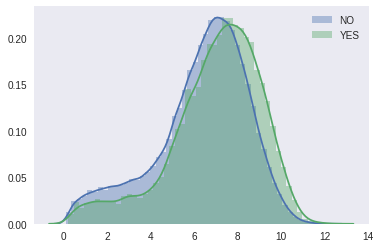

In [19]:
sns.distplot(X.loc[X.segment == 0, :].mean(axis='columns').map(np.log1p), label='NO')
sns.distplot(X.loc[X.segment == 1, :].mean(axis='columns').map(np.log1p), label='YES')
plt.legend(loc='best');

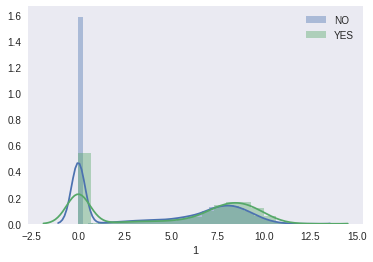

In [22]:
sns.distplot(X.loc[X.segment == 0, 1].map(np.log1p), label='NO')
sns.distplot(X.loc[X.segment == 1, 1].map(np.log1p), label='YES')
plt.legend(loc='best');

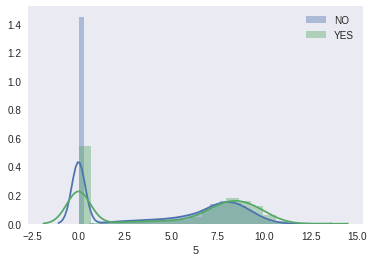

In [25]:
sns.distplot(X.loc[X.segment == 0, 5].map(np.log1p), label='NO')
sns.distplot(X.loc[X.segment == 1, 5].map(np.log1p), label='YES')
plt.legend(loc='best');

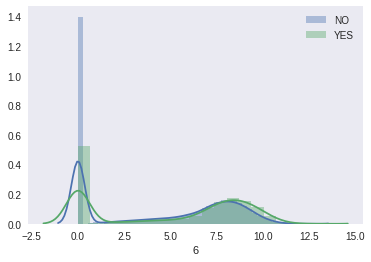

In [23]:
sns.distplot(X.loc[X.segment == 0, 6].map(np.log1p), label='NO')
sns.distplot(X.loc[X.segment == 1, 6].map(np.log1p), label='YES')
plt.legend(loc='best');

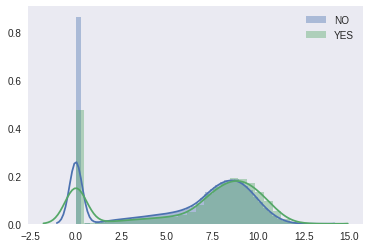

In [35]:
sns.distplot((X.loc[X.segment == 0, 6] + X.loc[X.segment == 0, 7]).map(np.log1p), label='NO')
sns.distplot((X.loc[X.segment == 1, 6] + X.loc[X.segment == 1, 7]).map(np.log1p), label='YES')
plt.legend(loc='best');

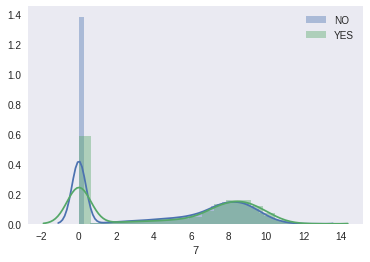

In [24]:
sns.distplot(X.loc[X.segment == 0, 7].map(np.log1p), label='NO')
sns.distplot(X.loc[X.segment == 1, 7].map(np.log1p), label='YES')
plt.legend(loc='best');

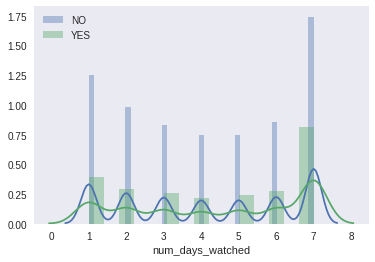

In [31]:
sns.distplot(X.loc[X.segment == 0, 'num_days_watched'], label='NO')
sns.distplot(X.loc[X.segment == 1, 'num_days_watched'], label='YES')
plt.legend(loc='best');

In [75]:
def create_dict_features(feature):

    train = data.loc[train_mask, feature].map(lambda x: x.split(','))\
                         .map(lambda x: dict((k.strip(), int(v.strip())) for k,v in 
                                              (item.split(':') for item in x)))
        
    dv    = DictVectorizer(sparse=False)
    X     = pd.DataFrame(dv.fit_transform(train), columns=dv.get_feature_names())
    y     = data.loc[train_mask, 'segment']
    
    return pd.concat((X, y), axis='columns')

In [51]:
tod_train = create_dict_features('tod')

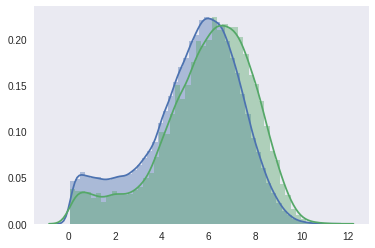

In [56]:
cols = tod_train.columns[:-1]
sns.distplot(tod_train.loc[tod_train.segment == 0, cols].mean(axis='columns').map(np.log1p))
sns.distplot(tod_train.loc[tod_train.segment == 1, cols].mean(axis='columns').map(np.log1p));

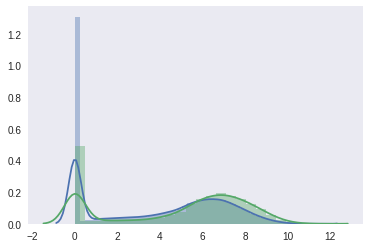

In [59]:
sns.distplot(tod_train.loc[tod_train.segment == 0, [0, 1, 2, 3, 4, 5]].mean(axis='columns').map(np.log1p))
sns.distplot(tod_train.loc[tod_train.segment == 1, [0, 1, 2, 3, 4, 5]].mean(axis='columns').map(np.log1p));

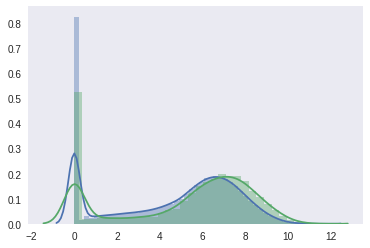

In [60]:
sns.distplot(tod_train.loc[tod_train.segment == 0, [6, 7, 8, 9, 10, 11]].mean(axis='columns').map(np.log1p))
sns.distplot(tod_train.loc[tod_train.segment == 1, [6, 7, 8, 9, 10, 11]].mean(axis='columns').map(np.log1p));

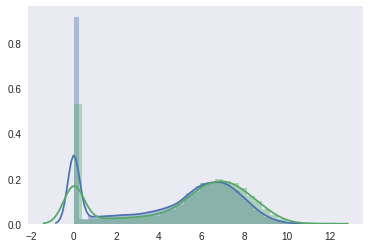

In [61]:
sns.distplot(tod_train.loc[tod_train.segment == 0, [12, 13, 14, 15, 16, 17]].mean(axis='columns').map(np.log1p))
sns.distplot(tod_train.loc[tod_train.segment == 1, [12, 13, 14, 15, 16, 17]].mean(axis='columns').map(np.log1p));

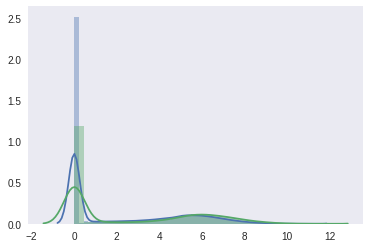

In [62]:
sns.distplot(tod_train.loc[tod_train.segment == 0, [17, 18, 19, 20, 21, 22, 23]].mean(axis='columns').map(np.log1p))
sns.distplot(tod_train.loc[tod_train.segment == 1, [17, 18, 19, 20, 21, 22, 23]].mean(axis='columns').map(np.log1p));

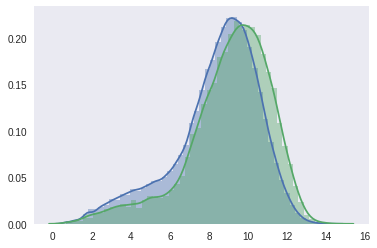

In [68]:
sns.distplot(X.loc[X.segment == 0, [1, 2, 3, 4, 5, 6, 7]].sum(axis='columns').map(np.log1p))
sns.distplot(X.loc[X.segment == 1, [1, 2, 3, 4, 5, 6, 7]].sum(axis='columns').map(np.log1p));

In [76]:
genres_train = create_dict_features('genres')

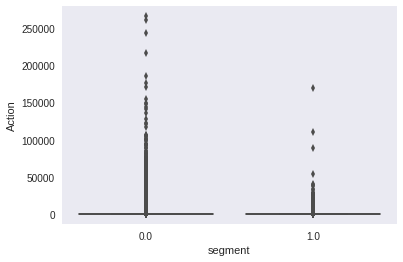

In [87]:
sns.boxplot(x=genres_train.segment, y=genres_train.Action);

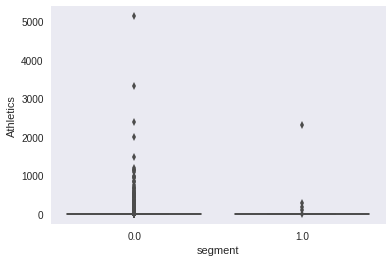

In [89]:
sns.boxplot(x=genres_train.segment, y=genres_train.Athletics);

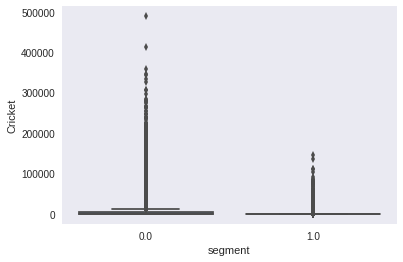

In [93]:
sns.boxplot(x=genres_train.segment, y=genres_train.Cricket);

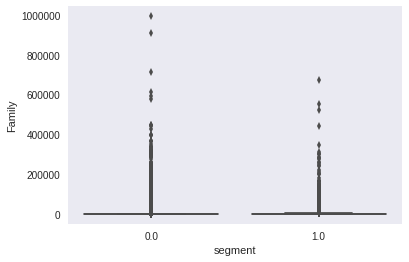

In [92]:
sns.boxplot(x=genres_train.segment, y=genres_train.Family);

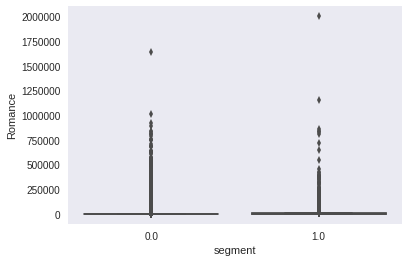

In [94]:
sns.boxplot(x=genres_train.segment, y=genres_train.Romance);

** Relationship between cities and segment **

In [56]:
def get_watch_time_by_feature(train, feature_name):
    watch_time_map = defaultdict(list)
    
    for i in tqdm_notebook(range(len(train))):
        fs       = train.iloc[i][feature_name]
        segment  = train.iloc[i]['segment'] 
        
        elem    = fs.split(',')
        
        for e in elem:
            f, watch_time = e.split(':')
            watch_time = int(watch_time)
            
            watch_time_map[f].append([watch_time, segment])
    
    return watch_time_map

In [16]:
watch_time_map = get_watch_time_by_cities(data.loc[train_mask, ['cities', 'segment']],
                                          'cities'
                                         )

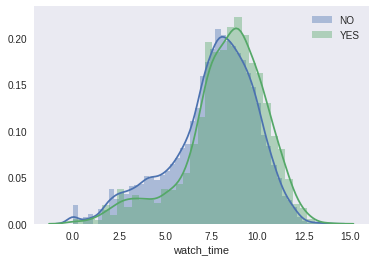

In [32]:
ss = pd.DataFrame(watch_time_map['chennai'], 
             columns=['watch_time', 'segment'])

sns.distplot(ss.loc[ss.segment == 0, 'watch_time'].map(np.log1p), label='NO')
sns.distplot(ss.loc[ss.segment == 1, 'watch_time'].map(np.log1p), label='YES')
plt.legend(loc='best');

** For most of the cities as watch time increaseas, chances of getting included in a segment also increases **

In [37]:
def get_count_by_cities(train):
    city_count_map = defaultdict(list)
    
    for i in tqdm_notebook(range(len(train))):
        cities  = train.iloc[i]['cities']
        segment = train.iloc[i]['segment'] 
        
        elem    = cities.split(',')
        
        for e in elem:
            city, watch_time = e.split(':')
            city_count = len(elem)
            
            city_count_map[city].append([city_count, segment])
    
    return city_count_map

In [38]:
city_count_map = get_count_by_cities(data.loc[train_mask, ['cities', 'segment']])

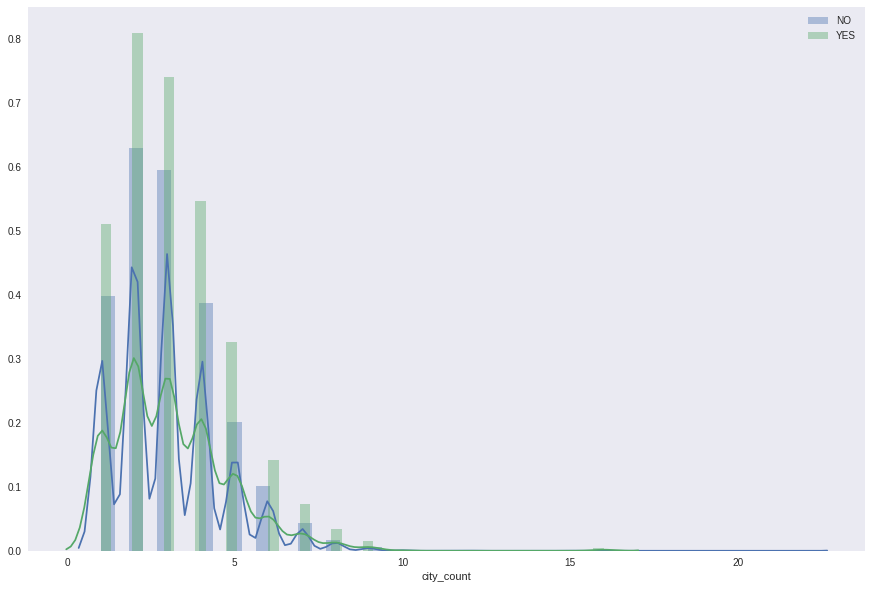

In [41]:
plt.figure(figsize=(15, 10))
ss = pd.DataFrame(city_count_map['chennai'], 
             columns=['city_count', 'segment'])

sns.distplot(ss.loc[ss.segment == 0, 'city_count'], label='NO')
sns.distplot(ss.loc[ss.segment == 1, 'city_count'], label='YES')
plt.legend(loc='best');

In [57]:
dow_watch_time_map = get_watch_time_by_feature(data.loc[train_mask, ['dow', 'segment']],
                                               'dow'
                                              )

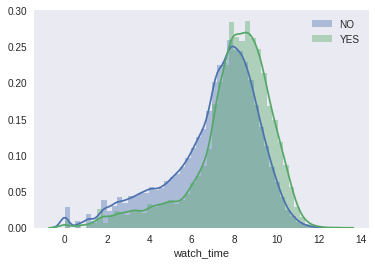

In [65]:
ss = pd.DataFrame(dow_watch_time_map['2'], 
             columns=['watch_time', 'segment'])

sns.distplot(ss.loc[ss.segment == 0, 'watch_time'].map(np.log1p), label='NO')
sns.distplot(ss.loc[ss.segment == 1, 'watch_time'].map(np.log1p), label='YES')
plt.legend(loc='best');

In [66]:
tod_watch_time_map = get_watch_time_by_feature(data.loc[train_mask, ['tod', 'segment']],
                                               'tod'
                                              )

In [92]:
data.head()

,ID,cities,dow,genres,segment,titles,tod
0,train-1,"gurgaon:55494,delhi:31892","1:3412,3:15878,2:1737,5:10975,4:20974,7:17820,...","Cricket:82379,Kabaddi:255,Reality:4751",0.0,"Top Raids: Haryana vs Services SCB:103,Day 4: ...","10:26,13:331,12:323,20:21864,21:16233,17:7953,..."
1,train-10,"delhi:5862,nagar:8916,mumbai:1593","1:5745,3:3025,2:3346,5:123,4:3007,7:1108,6:10","Cricket:15640,Wildlife:730",0.0,"Dhoni Quits Captaincy:148,Day 4: India Move in...","11:1661,10:384,20:401,21:798,22:221,16:525,19:..."
2,train-100,navi mumbai:4142,3:4142,"LiveTV:13,Football:4129",0.0,"Star Sports 4:13,Manchester United vs Everton:...","1:1207,0:2406,2:529"
3,train-1000,"new delhi:4131,chennai:2878,navi mumbai:1339","1:658,3:5867,5:413,4:1339,7:71","TalkShow:658,Cricket:7690",0.0,"SRH vs RCB:701,KKR vs KXIP:1042,MI vs SRH:2288...","11:71,20:2417,21:1042,23:2288,19:1872,8:658"
4,train-10000,"gurgaon:6077,chennai:4055","1:1641,2:480,4:1445,7:1663,6:4900","Drama:5503,Cricket:3283,Reality:1345",0.0,"MI vs KKR:304,Yeh Rishta Kya Kehlata Hai:5449,...","20:158,22:4139,17:67,23:1510,19:288,18:56,0:23..."


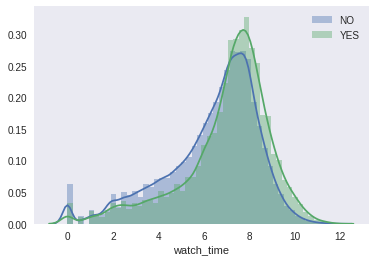

In [91]:
ss = pd.DataFrame(tod_watch_time_map['18'], 
             columns=['watch_time', 'segment'])

sns.distplot(ss.loc[ss.segment == 0, 'watch_time'].map(np.log1p), label='NO')
sns.distplot(ss.loc[ss.segment == 1, 'watch_time'].map(np.log1p), label='YES')
plt.legend(loc='best');

** Unique Genres **

In [173]:
ug = defaultdict(int)

start = time.time()

def update(genres):
    genres = genres.split(',')
    
    for genre in genres:
        ug[genre] += 1
    
    return None

data.loc[train_mask & data.segment == 1, :]\
    .genres.str.replace(':\d+', '')\
    .map(update)

end = time.time()
print('Took: {} seconds'.format(end - start))

Took: 0.07325863838195801 seconds


In [174]:
ss = pd.Series(ug).sort_values(ascending=False)

In [177]:
ss

Drama           9600
Romance         8337
Family          5912
TalkShow        5526
Reality         3903
Comedy          3428
Cricket         3129
Thriller        1891
Action          1773
Crime           1342
Awards           891
LiveTV           834
Mythology        762
Kids             504
Horror           501
Teen             234
Badminton        188
Travel           182
Football         158
Wildlife         146
Sport             98
Science           74
Documentary       53
Kabaddi           28
Hockey            22
Tennis             7
Formula1           6
Athletics          5
Table Tennis       2
NA                 1
dtype: int64

In [178]:
ug = defaultdict(int)

start = time.time()

def update(genres):
    genres = genres.split(',')
    
    for genre in genres:
        ug[genre] += 1
    
    return None

data.loc[train_mask & data.segment == 0, :]\
    .genres.str.replace(':\d+', '')\
    .map(update)

end = time.time()
print('Took: {} seconds'.format(end - start))

Took: 1.045381784439087 seconds


In [179]:
zz = pd.Series(ug).sort_values(ascending=False)

In [180]:
zz

Cricket         165875
Drama           138486
Romance          98251
Reality          82453
TalkShow         73895
Comedy           67087
Family           60557
Action           52088
LiveTV           41023
Crime            33777
Thriller         32675
Mythology        18148
Awards           17631
Football         11270
Badminton        10085
Horror            9484
Sport             8990
Kids              6860
Travel            6260
Wildlife          5832
Teen              2903
Science           2683
Hockey            2520
Kabaddi           1330
Documentary       1322
Formula1           529
Tennis             420
Athletics          386
Table Tennis       321
FormulaE            45
Volleyball          42
Boxing              41
NA                  16
Swimming            10
IndiaVsSa            2
dtype: int64

In [113]:
(ss / (ss + zz)).sort_values(ascending=False)

Family          0.088944
Romance         0.078217
Teen            0.074594
TalkShow        0.069579
Kids            0.068441
Drama           0.064827
NA              0.058824
Thriller        0.054707
Horror          0.050175
Comedy          0.048614
Awards          0.048105
Reality         0.045197
Mythology       0.040296
Documentary     0.038545
Crime           0.038213
Action          0.032918
Travel          0.028252
Science         0.026841
Wildlife        0.024423
Kabaddi         0.020619
LiveTV          0.019925
Cricket         0.018514
Badminton       0.018300
Tennis          0.016393
Football        0.013826
Athletics       0.012788
Formula1        0.011215
Sport           0.010783
Hockey          0.008655
Table Tennis    0.006192
Boxing               NaN
FormulaE             NaN
IndiaVsSa            NaN
Swimming             NaN
Volleyball           NaN
dtype: float64

** Check for pair of genres. **

In [190]:
ug = defaultdict(int)

def update_pairs(genres):
    genres = genres.split(',')
    
    for p in combinations(genres, 2):
        p = tuple(natsorted(list(p)))
        ug[p] += 1
    
    return None


start = time.time()

data.loc[train_mask & (data.segment == 1), 'genres']\
    .str.replace(r':\d+', '').map(update_pairs)
    
end = time.time()

print('Took: {} seconds'.format(end - start))
zz = pd.Series(ug)

Took: 2.9267194271087646 seconds


In [191]:
zz.sort_values(ascending=False)

Drama         Romance         6082
              Family          4542
Family        Romance         4425
Drama         TalkShow        3143
Romance       TalkShow        2847
Drama         Reality         2737
Reality       Romance         2563
Comedy        Drama           2460
              Romance         2172
Cricket       Drama           2142
Comedy        TalkShow        1872
Family        Reality         1863
              TalkShow        1809
Reality       TalkShow        1795
Cricket       Romance         1755
Drama         Thriller        1527
Romance       Thriller        1396
Comedy        Family          1362
Action        Drama           1347
Cricket       Family          1285
Comedy        Reality         1208
Cricket       Reality         1176
              TalkShow        1154
Action        Romance         1131
Crime         Drama           1006
Family        Thriller         957
Comedy        Cricket          917
Crime         Romance          841
TalkShow      Thrill

In [192]:
ug = defaultdict(int)

def update_pairs(genres):
    genres = genres.split(',')
    
    for p in combinations(genres, 2):
        p = tuple(natsorted(list(p)))
        ug[p] += 1
    
    return None


start = time.time()

data.loc[train_mask & (data.segment == 0), 'genres']\
    .str.replace(r':\d+', '').map(update_pairs)
    
end = time.time()

print('Took: {} seconds'.format(end - start))
ss = pd.Series(ug)

Took: 34.37349987030029 seconds


In [193]:
ss.sort_values(ascending=False)

Cricket      Drama           52879
             Reality         40231
Drama        Romance         38788
Cricket      Romance         33903
             TalkShow        28409
Comedy       Cricket         27308
Drama        Reality         26416
             Family          24712
Comedy       Drama           23731
Action       Cricket         23678
Family       Romance         23146
Cricket      LiveTV          22213
Drama        TalkShow        21257
Reality      Romance         20052
Action       Drama           20038
Cricket      Family          18103
Comedy       Romance         17607
Reality      TalkShow        16317
Romance      TalkShow        15933
Comedy       TalkShow        15170
             Reality         15081
Cricket      Crime           14509
             Thriller        14508
Drama        Thriller        14356
Action       Romance         13944
Drama        LiveTV          12862
Action       Comedy          12756
Family       Reality         12097
Crime        Drama  

In [128]:
ss.loc[ss > 700].ix[('TalkShow', 'Kids')]

221

In [194]:
(zz / (ss.loc[ss > 700] + zz)).sort_values(ascending=False)

Family        TalkShow    0.166268
              Romance     0.160495
Drama         Family      0.155261
Family        Teen        0.152196
Romance       TalkShow    0.151597
Family        Kids        0.142470
Kids          TalkShow    0.142403
Family        Thriller    0.141673
TalkShow      Teen        0.141291
Romance       Teen        0.138239
Family        Horror      0.136106
Drama         Romance     0.135547
Family        Reality     0.133453
Drama         Teen        0.131684
              TalkShow    0.128811
Comedy        Family      0.123672
Awards        Family      0.123356
Kids          Romance     0.122095
Horror        TalkShow    0.117797
Reality       Teen        0.117386
Drama         Kids        0.116638
Comedy        Kids        0.115297
Romance       Thriller    0.115210
Reality       Romance     0.113332
Comedy        TalkShow    0.109846
              Romance     0.109813
Awards        Romance     0.108079
Horror        Romance     0.107579
TalkShow      Thrill

** Feature Interaction **

In [169]:
sample = pd.DataFrame({
    'a': [0, 1, 2, 3, 4],
    'b': [4, 5, 6, 6, 7],
    'c': [1231, 12323, 2131, 186813, 1232],
    'd': ['1', 'a', 'b', 'c', 'd']
})

In [170]:
def group_data(dd, degree=2):
    new_data = []
    m, n = dd.shape
    
    for indices in combinations(dd.columns, degree):
        print('indices ', list(indices))
        new_data.append([hash(tuple(v)) for v in dd.loc[:, list(indices)].values])
        
    return np.array(new_data).T

In [171]:
group_data(sample)

indices  ['a', 'b']
indices  ['a', 'c']
indices  ['a', 'd']
indices  ['b', 'c']
indices  ['b', 'd']
indices  ['c', 'd']


array([[ 3713080549412658231,  3713080550585032806, -2964044259052896873,
         3713084880706683306, -2964039933936841973, -2961888136276091048],
       [ 3713081631939823281,  3713081636332709731, -3867616707576071619,
         3713085966445700031, -3867620889677583719, -3872017817295166069],
       [ 3713082714458328131,  3713082716628790756,   676073585345615148,
         3713087042273117856,   676068687149485448,   678572767032556573],
       [ 3713083796999566006,  3713083666565046231, -2645688372481534680,
         3713087233107120006, -2645684808279879955, -2896925619311346930],
       [ 3713084879520235906,  3713084880681785231, -8792479809743199992,
         3713088128405091156, -8792480863023787117, -8789544870582910492]])

** Are certain genres indicative of user being part of a segment ? **

In [23]:
start = time.time()
ohe_genres = data.genres.str.replace(r':\d+', '').str.get_dummies(sep=',')
tod_genres = data.tod.str.replace(r':\d+', '').str.get_dummies(sep=',')
end   = time.time()

print('Took: {} seconds'.format(end - start))

Took: 13.696777820587158 seconds


In [24]:
ohe_f = pd.concat((ohe_genres, tod_genres, data.segment), axis='columns')

In [27]:
ohe_f.loc[train_mask, :].pivot_table(columns=['Drama', 'Comedy', 'Family'],
                                          index=tod_genres.columns.tolist(),
                                          values='segment',
                                          aggfunc='mean'
                                         )

Drama                                                                 0  \
Comedy                                                                0   
Family                                                                0   
0 1 10 11 12 13 14 15 16 17 18 19 2 20 21 22 23 3 4 5 6 7 8 9             
0 0 0  0  0  0  0  0  0  0  0  0  0 0  0  0  0  0 0 0 0 0 0 1  0.041139   
                                                          1 0  0.055147   
                                                            1  0.111111   
                                                        1 0 0  0.029703   
                                                            1  0.000000   
                                                          1 0  0.039216   
                                                            1  0.111111   
                                                      1 0 0 0  0.026549   
                                                            1  0.000000   
                                                          1 0  0.000000   
                                                            1       NaN   
                                                        1 0 0  0.102564   
                                                            1  0.000000   
                                                          1 0  0.142857   
                                                            1  0.200000   
                                                    1 0 0 0 0  0.095890   
                                                            1  0.000000   
                                                          1 0       NaN   
                                                            1       NaN   
                                                        1 0 0  0.000000   
                                                          1 0       NaN   
                                                            1  1.000000   
                                                      1 0 0 0  0.166667   
                                                            1  0.000000   
                                                          1 0  1.000000   
                                                            1       NaN   
                                                        1 0 0  0.000000   
                                                            1       NaN   
                                                          1 0  0.000000   
                                                            1  0.000000   
...                                                                 ...   
1 1 1  1  1  1  1  1  1  1  1  1  1 1  1  1  1  1 1 0 0 0 1 0       NaN   
                                                            1  0.000000   
                                                        1 0 0       NaN   
                                                            1       NaN   
                                                          1 0  0.000000   
                                                            1  0.000000   
                                                      1 0 0 0  0.000000   
                                                            1       NaN   
                                                          1 0       NaN   
                                                            1       NaN   
                                                        1 0 0  0.000000   
                                                            1       NaN   
                                                          1 0       NaN   
                                                            1  0.000000   
                                                    1 0 0 0 0  0.000000   
                                                            1  0.000000   
                                                          1 0       NaN   
                                                            1  0.000000   
                         